In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load dataset iris
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
feature_names = iris.feature_names
target_names = iris.target_names

In [5]:
# Membuat DataFrame untuk visualisasi
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("Dataset Iris Sebelum PCA:")
print(df)

Dataset Iris Sebelum PCA:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

 

In [7]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Menerapkan PCA
pca = PCA(n_components=2)  # Mengurangi dimensi menjadi 2 komponen utama
X_pca = pca.fit_transform(X_scaled)

In [9]:
# Membuat DataFrame untuk data setelah PCA
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y

print("\nDataset Iris Setelah PCA:")
print(df_pca.head())


Dataset Iris Setelah PCA:
       PCA1      PCA2  target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0
3 -2.299384 -0.597395       0
4 -2.389842  0.646835       0


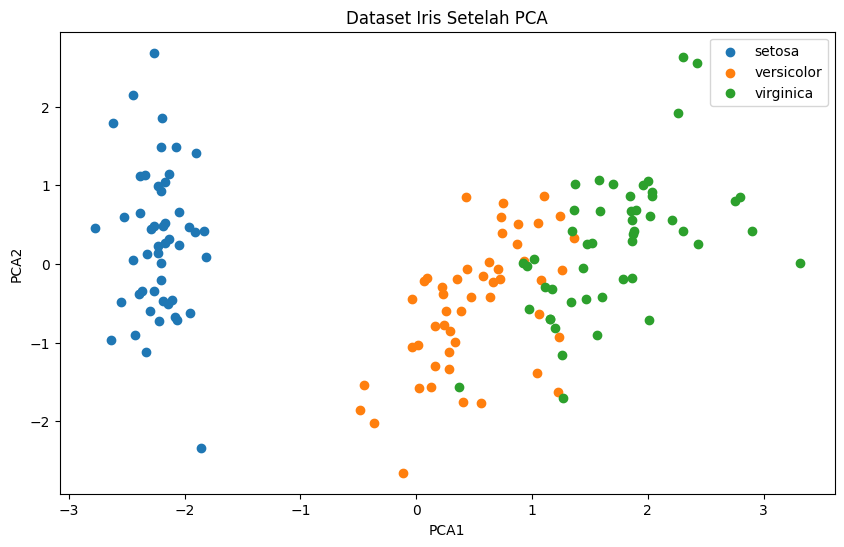

In [10]:
# Visualisasi dataset setelah PCA
plt.figure(figsize=(10, 6))
for i in range(len(target_names)):
    subset = df_pca[df_pca['target'] == i]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=target_names[i])
plt.title("Dataset Iris Setelah PCA")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Membangun model SVM
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Melakukan prediksi pada testing set
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)
print("\nConfusion Matriks:\n", conf_matrix)

Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Confusion Matriks:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [ ]:
# Menampilkan hasil prediksi dan label sebenarnya
result_df = pd.DataFrame({'Prediksi': y_pred, 'Sebenarnya': y_test})
result_df['Prediksi'] = result_df['Prediksi'].apply(lambda x: target_names[x])
result_df['Sebenarnya'] = result_df['Sebenarnya'].apply(lambda x: target_names[x])
print("\nHasil Prediksi dan Label Sebenarnya:\n")
print(result_df)


Hasil Prediksi dan Label Sebenarnya:

      Prediksi  Sebenarnya
0   versicolor  versicolor
1       setosa      setosa
2    virginica   virginica
3   versicolor  versicolor
4    virginica  versicolor
5       setosa      setosa
6   versicolor  versicolor
7    virginica   virginica
8    virginica  versicolor
9   versicolor  versicolor
10   virginica   virginica
11      setosa      setosa
12      setosa      setosa
13      setosa      setosa
14      setosa      setosa
15  versicolor  versicolor
16   virginica   virginica
17  versicolor  versicolor
18  versicolor  versicolor
19   virginica   virginica
20      setosa      setosa
21  versicolor   virginica
22      setosa      setosa
23   virginica   virginica
24   virginica   virginica
25   virginica   virginica
26   virginica   virginica
27   virginica   virginica
28      setosa      setosa
29      setosa      setosa


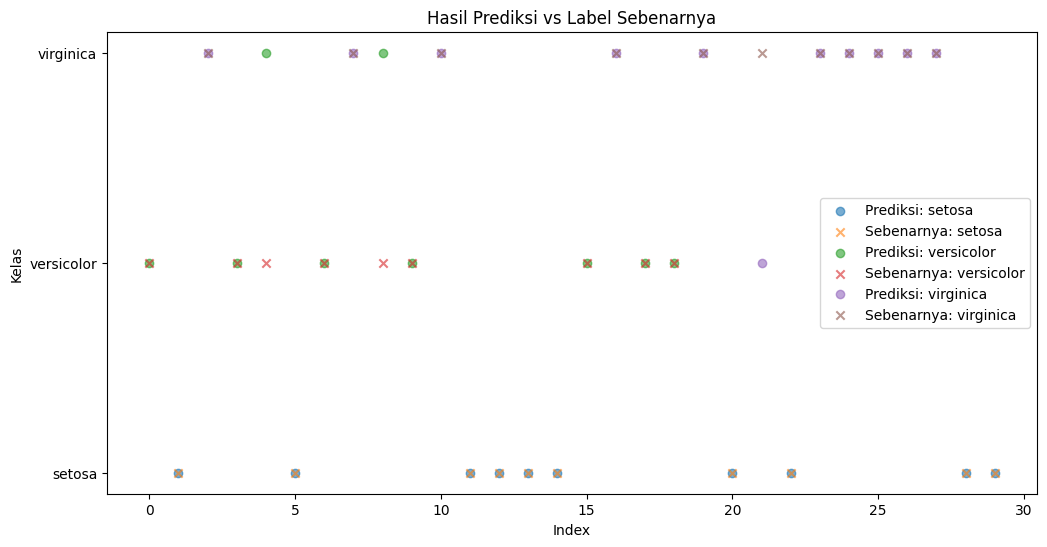

In [ ]:
# Visualisasi hasil prediksi vs data sebenarnya
plt.figure(figsize=(12, 6))
for i, target_name in enumerate(target_names):
    subset = result_df[result_df['Sebenarnya'] == target_name]
    plt.scatter(subset.index, subset['Prediksi'], label=f'Prediksi: {target_name}', alpha=0.6)
    plt.scatter(subset.index, subset['Sebenarnya'], label=f'Sebenarnya: {target_name}', alpha=0.6, marker='x')
plt.title("Hasil Prediksi vs Label Sebenarnya")
plt.xlabel('Index')
plt.ylabel('Kelas')
plt.legend()
plt.show()